# Рудковская Оксана, Элементарные методы анализа временных рядов

Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

In [1]:
import pandas as pd
import numpy as np

In [2]:
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")# yes
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### dowjones_closing, Double_EMA

Двойное экспоненциальное сглаживание было выбрано, поскольку ряд "dowjones_closing" имеет тренды, что в данной модели MA присутствует
Сезонности нет, тройное экспоненциальное сглаживание было бы лишнее

In [4]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [5]:
def plot_dema(alpha, beta):
    dema = double_ema(dowjones_closing["Close"], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(dowjones_closing["Close"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

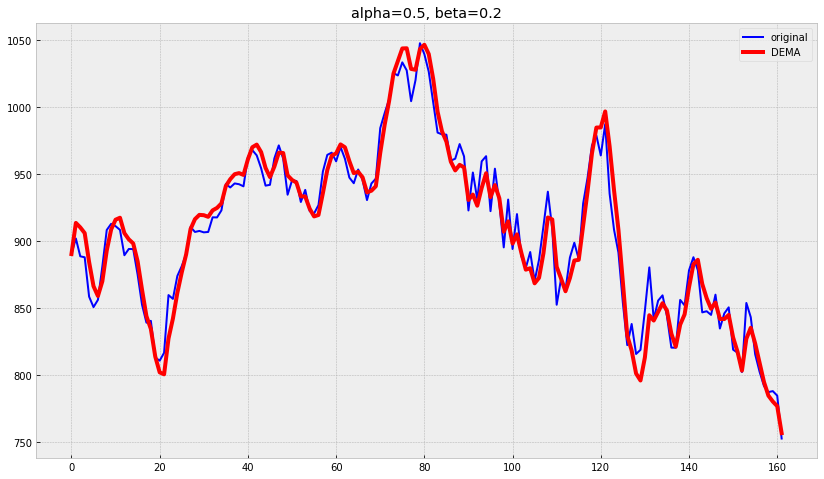

In [6]:
plot_dema(0.5, 0.2)

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
np.sqrt(mean_squared_error(dowjones_closing["Close"], double_ema(dowjones_closing["Close"], 0.5, 0.2)))

12.216579017083165

### female_births, WMA

Взвешенное скользящее среднее было выбрано, поскольку у стационарного ряда нет сезонности и тренда, он менее привязан к историческим данным в ряду, больше значимы для него последние значения.

In [9]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [10]:
series = female_births["Count"]
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

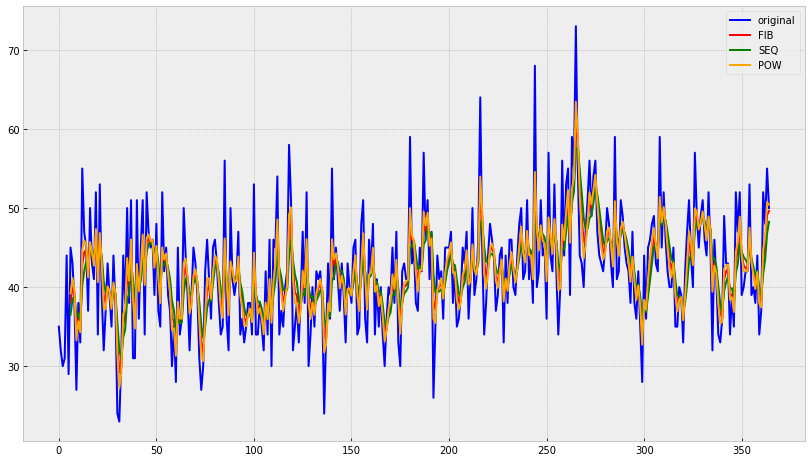

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

In [12]:
print (f"FIB:    RMSE = {np.sqrt(mean_squared_error(series[6:], wma_fib[6:])):.3f}")
print (f"SEQ:    RMSE = {np.sqrt(mean_squared_error(series[6:], wma_seq[6:])):.3f}")
print (f"POW:    RMSE = {np.sqrt(mean_squared_error(series[6:], wma_pow[6:])):.3f}")

FIB:    RMSE = 4.573
SEQ:    RMSE = 5.607
POW:    RMSE = 3.832
